# Getting deeper with Keras
* Tensorflow is a powerful and flexible tool, but coding large neural architectures with it is tedious.
* There are plenty of deep learning toolkits that work on top of it like Slim, TFLearn, Sonnet, Keras.
* Choice is matter of taste and particular task
* We'll be using Keras

In [0]:
import sys
sys.path.append("..")
import grading

In [1]:
! shred -u setup_google_colab.py
! wget https://raw.githubusercontent.com/hse-aml/intro-to-dl/master/setup_google_colab.py -O setup_google_colab.py
import setup_google_colab
setup_google_colab.setup_week2()

shred: setup_google_colab.py: failed to open for writing: No such file or directory
--2019-08-11 14:16:26--  https://raw.githubusercontent.com/hse-aml/intro-to-dl/master/setup_google_colab.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3792 (3.7K) [text/plain]
Saving to: ‘setup_google_colab.py’

setup_google_colab. 100%[===================>]   3.70K  --.-KB/s    in 0s      

2019-08-11 14:16:26 (77.8 MB/s) - ‘setup_google_colab.py’ saved [3792/3792]

**************************************************
inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
**************************************************
cifar-10-batches-py.tar.gz
**************************************************
mnist.npz


In [0]:
# use preloaded keras datasets and models
! mkdir -p ~/.keras/datasets
! mkdir -p ~/.keras/models
! ln -s $(realpath ../readonly/keras/datasets/*) ~/.keras/datasets/
! ln -s $(realpath ../readonly/keras/models/*) ~/.keras/models/

In [4]:
import numpy as np
from preprocessed_mnist import load_dataset
import keras
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
y_train,y_val,y_test = map(keras.utils.np_utils.to_categorical,[y_train,y_val,y_test])

Using TensorFlow backend.


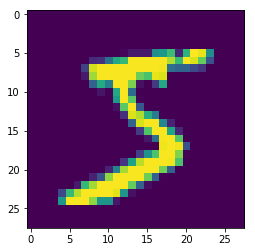

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0]);

## The pretty keras

In [6]:
import tensorflow as tf
from keras_utils import reset_tf_session
s = reset_tf_session()

W0811 14:17:31.916893 140533877864320 deprecation_wrapper.py:119] From /content/keras_utils.py:68: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0811 14:17:31.918601 140533877864320 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:79: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0811 14:17:31.920403 140533877864320 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:82: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0811 14:17:31.933304 140533877864320 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:84: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0811 14:17:31.935374 140533877864320 deprecation_wrapper.py:119] F

In [7]:
import keras
from keras.models import Sequential
import keras.layers as ll

model = Sequential(name="mlp")

model.add(ll.InputLayer([28, 28]))

model.add(ll.Flatten())

# network body
model.add(ll.Dense(25))
model.add(ll.Activation('linear'))

model.add(ll.Dense(25))
model.add(ll.Activation('linear'))

# output layer: 10 neurons for each class with softmax
model.add(ll.Dense(10, activation='softmax'))

# categorical_crossentropy is your good old crossentropy
# but applied for one-hot-encoded vectors
model.compile("adam", "categorical_crossentropy", metrics=["accuracy"])

W0811 14:17:36.444245 140533877864320 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1210: calling reduce_prod_v1 (from tensorflow.python.ops.math_ops) with keep_dims is deprecated and will be removed in a future version.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
W0811 14:17:36.494582 140533877864320 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:697: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0811 14:17:36.514436 140533877864320 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:2745: calling reduce_sum_v1 (from tensorflow.python.ops.math_ops) with keep_dims is deprecated and will be removed in a future version.
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 25)                19625     
_________________________________________________________________
activation_1 (Activation)    (None, 25)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 25)                650       
_________________________________________________________________
activation_2 (Activation)    (None, 25)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                260       
Total para

### Model interface

Keras models follow __Scikit-learn__'s interface of fit/predict with some notable extensions. Let's take a tour.

In [9]:
# fit(X,y) ships with a neat automatic logging.
#          Highly customizable under the hood.
model.fit(X_train, y_train,
          validation_data=(X_val, y_val), epochs=5);

W0811 14:19:22.089129 140533877864320 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0811 14:19:22.315683 140533877864320 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:602: calling Constant.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 3s - loss: 0.4115 - acc: 0.8822 - val_loss: 0.2817 - val_acc: 0.9230
Epoch 2/5
50000/50000 [==============================] - 3s - loss: 0.3040 - acc: 0.9144 - val_loss: 0.2826 - val_acc: 0.9180
Epoch 3/5
50000/50000 [==============================] - 3s - loss: 0.2892 - acc: 0.9191 - val_loss: 0.2697 - val_acc: 0.9251
Epoch 4/5
50000/50000 [==============================] - 3s - loss: 0.2816 - acc: 0.9206 - val_loss: 0.2710 - val_acc: 0.9258
Epoch 5/5
50000/50000 [==============================] - 3s - loss: 0.2767 - acc: 0.9230 - val_loss: 0.2755 - val_acc: 0.9247


In [10]:
# estimate probabilities P(y|x)
model.predict_proba(X_val[:2])

2/2 [==============================] - 0s


array([[2.1376929e-05, 1.0694889e-02, 1.5352534e-02, 9.1871226e-01,
        1.5875784e-06, 2.3752054e-02, 2.7455969e-04, 2.6009243e-08,
        3.1188127e-02, 2.6509815e-06],
       [1.6684959e-06, 9.6083822e-06, 3.6173374e-03, 1.1958146e-02,
        2.2647604e-03, 2.9474210e-02, 2.9020073e-06, 1.1176617e-05,
        9.5239645e-01, 2.6379144e-04]], dtype=float32)

In [0]:
# Save trained weights
model.save("weights.h5")

In [12]:
print("\nLoss, Accuracy = ", model.evaluate(X_test, y_test))

 9632/10000 [===========================>..] - ETA: 0s
Loss, Accuracy =  [0.29139084677994254, 0.9157]


### Whoops!
So far, our model is staggeringly inefficient. There is something wrong with it. Guess, what?

In [13]:
# Test score...
test_predictions = model.predict_proba(X_test).argmax(axis=-1)
test_answers = y_test.argmax(axis=-1)

test_accuracy = np.mean(test_predictions==test_answers)

print("\nTest accuracy: {} %".format(test_accuracy*100))

assert test_accuracy>=0.92,"Logistic regression can do better!"
assert test_accuracy>=0.975,"Your network can do better!"
print("Great job!")

 9504/10000 [===========================>..] - ETA: 0s
Test accuracy: 91.57 %


AssertionError: ignored

In [0]:
answer_submitter = grading.Grader("0ybD9ZxxEeea8A6GzH-6CA")
answer_submitter.set_answer("N56DR", test_accuracy)

In [0]:
answer_submitter.submit(<mlvnjacob315@gmail.com>, <your-assignment-token>)

## Keras + tensorboard

Remember the interactive graphs from Tensorboard one notebook ago? 

Thing is, Keras can use tensorboard to show you a lot of useful information about the learning progress. Just take a look!

In [15]:
! rm -r /tmp/tboard/**

rm: cannot remove '/tmp/tboard/**': No such file or directory


In [16]:
from keras.callbacks import TensorBoard
model.fit(X_train, y_train, validation_data=(X_val, y_val), 
          epochs=10,
          callbacks=[TensorBoard("/tmp/tboard")])

W0811 14:21:11.538109 140533877864320 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/callbacks.py:699: The name tf.summary.merge_all is deprecated. Please use tf.compat.v1.summary.merge_all instead.

W0811 14:21:11.544280 140533877864320 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/callbacks.py:702: The name tf.summary.FileWriter is deprecated. Please use tf.compat.v1.summary.FileWriter instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 3s - loss: 0.2717 - acc: 0.9240 - val_loss: 0.2667 - val_acc: 0.9270
Epoch 2/10
50000/50000 [==============================] - 3s - loss: 0.2711 - acc: 0.9242 - val_loss: 0.2745 - val_acc: 0.9260
Epoch 3/10
50000/50000 [==============================] - 3s - loss: 0.2682 - acc: 0.9242 - val_loss: 0.2643 - val_acc: 0.9301
Epoch 4/10
50000/50000 [==============================] - 3s - loss: 0.2662 - acc: 0.9247 - val_loss: 0.2676 - val_acc: 0.9290
Epoch 5/10
50000/50000 [==============================] - 3s - loss: 0.2639 - acc: 0.9250 - val_loss: 0.2651 - val_acc: 0.9303
Epoch 6/10
50000/50000 [==============================] - 3s - loss: 0.2617 - acc: 0.9260 - val_loss: 0.2706 - val_acc: 0.9252
Epoch 7/10
50000/50000 [==============================] - 3s - loss: 0.2592 - acc: 0.9271 - val_loss: 0.2638 - val_acc: 0.9300
Epoch 8/10
50000/50000 [==============================] - 3s 

# Tips & tricks

Here are some tips on what you could do. Don't worry, to reach the passing threshold you don't need to try all the ideas listed here, feel free to stop once you reach the 0.975 accuracy mark.

 * __Network size__
   * More neurons, 
   * More layers, ([docs](https://keras.io/))

   * Nonlinearities in the hidden layers
     * tanh, relu, leaky relu, etc
   * Larger networks may take more epochs to train, so don't discard your net just because it could didn't beat the baseline in 5 epochs.


 * __Early Stopping__
   * Training for 100 epochs regardless of anything is probably a bad idea.
   * Some networks converge over 5 epochs, others - over 500.
   * Way to go: stop when validation score is 10 iterations past maximum
     

 * __Faster optimization__
   * rmsprop, nesterov_momentum, adam, adagrad and so on.
     * Converge faster and sometimes reach better optima
     * It might make sense to tweak learning rate/momentum, other learning parameters, batch size and number of epochs


 * __Regularize__ to prevent overfitting
   * Add some L2 weight norm to the loss function, theano will do the rest
     * Can be done manually or via - https://keras.io/regularizers/
   
   
 * __Data augmemntation__ - getting 5x as large dataset for free is a great deal
   * https://keras.io/preprocessing/image/
   * Zoom-in+slice = move
   * Rotate+zoom(to remove black stripes)
   * any other perturbations
   * Simple way to do that (if you have PIL/Image): 
     * ```from scipy.misc import imrotate,imresize```
     * and a few slicing
   * Stay realistic. There's usually no point in flipping dogs upside down as that is not the way you usually see them.